In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm

In [2]:
def n_pdf(x, mu=0., sigma=1.):  # normal pdf
    u = (x - mu) / abs(sigma)
    y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
    y *= np.exp(-u * u / 2)
    return y

def ksdensity(data, width=0.3):
    """Returns kernel smoothing function from data points in data"""
    def ksd(x_axis):
        def n_pdf(x, mu=0., sigma=1.): # normal pdf
            u = (x - mu) / abs(sigma)
            y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
            y *= np.exp(-u * u / 2)
            return y
        prob = [n_pdf(x_i, data, width) for x_i in x_axis]
        pdf = [np.average(pr) for pr in prob] # each row is one x value
        return np.array(pdf)
    return ksd


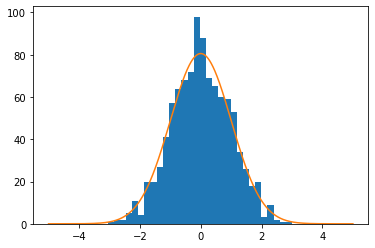

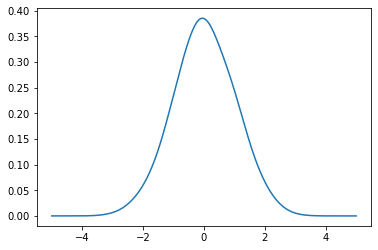

In [3]:
# Plot normal distribution
x = np.random.randn(1000)
plt.hist(x, bins=30) # number of bins


ks_density = ksdensity(x, width=0.4)
# np.linspace(start, stop, number of steps)
x_values = np.linspace(-5., 5., 1000)
plt.plot(x_values, n_pdf(x=x_values) *1000*(max(x)-min(x))/30)
plt.show()

plt.plot(x_values, ks_density(x_values))
plt.show()





In [4]:
# # Plot uniform distribution
# x = np.random.rand(1000)
# plt.hist(x, bins=20)
#
# ks_density = ksdensity(x, width=0.2)
# x_values = np.linspace(-1., 2., 1000)
# plt.axhline(y=1*1000*(max(x)-min(x))/30, color='r', linestyle='-')
# plt.show()
#
# plt.plot(x_values, ks_density(x_values))
# plt.show()



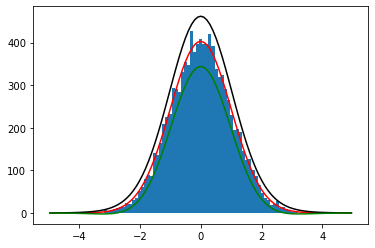

In [24]:
# plot the standard deviation

n_bin = 100
n_sample = 10000
x = np.random.randn(n_sample)
x_values = np.linspace(-5, 5, n_bin)
cdf_list = scipy.stats.norm.cdf(x_values)


p_value_list = []
theo_std = []
high_std = []
low_std = []
x_list = []

for k in range(n_bin-1):
    p_value = cdf_list[k+1] - cdf_list[k]
    x_list.append((x_values[k+1] + x_values[k])/2)
    p_value_list.append(p_value)
    
theo_mean = [n_sample * p_value for p_value in p_value_list]

# print(theo_mean)

for k in range(n_bin-1):
    theo_std_value = n_sample * p_value_list[k] * (1 - p_value_list[k])
    theo_std.append(np.sqrt(theo_std_value))
    
    
for k in range(n_bin-1):
    high_value = theo_mean[k] + 3 * theo_std[k]
    high_std.append(high_value)
    low_value = theo_mean[k] - 3 * theo_std[k]
    low_std.append(low_value)
    
plt.hist(x, bins=x_values)
plt.plot(x_list, theo_mean, color='r', linestyle='-')
plt.plot(x_list, high_std, color='k', linestyle='-')
plt.plot(x_list, low_std, color='g', linestyle='-')
plt.show()


